# Breast Cancer Diagnosis

### Importing Libraries

In [63]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist  
import warnings
warnings.simplefilter('ignore')

### Data Preprocesing 

In [45]:
Malignant = r'C:/Users/PC/Desktop/ML/Data/breast-cancer-dataset/Train/Malignant'
Benign = r'C:/Users/PC/Desktop/ML/Data/breast-cancer-dataset/Train/Benign'

In [46]:
def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".png"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            datos.append(imagen)
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

Malignant, etiquetas_Malignant = cargar_datos(Malignant, etiqueta = 2, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
Benign, etiquetas_Benign = cargar_datos(Benign, etiqueta = 1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

In [47]:
data = Malignant + Benign
etiquetas = etiquetas_Malignant + etiquetas_Benign

In [48]:
X = np.array(data)
Y = np.array(etiquetas)

In [49]:
print(X.shape, Y.shape)

(1280, 100, 100, 3) (1280,)


In [50]:
pd.Series(Y).value_counts()

2    640
1    640
dtype: int64

### Exploratory Data Analysis 

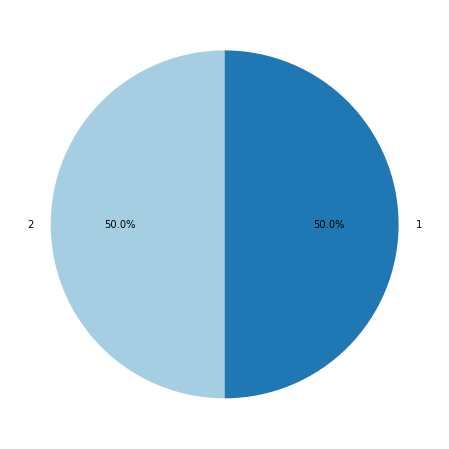

In [51]:
serie_etiquetas = pd.Series(Y)
conteo_etiquetas = serie_etiquetas.value_counts()

plt.figure(figsize = (10,8))
plt.pie(conteo_etiquetas, labels=conteo_etiquetas.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

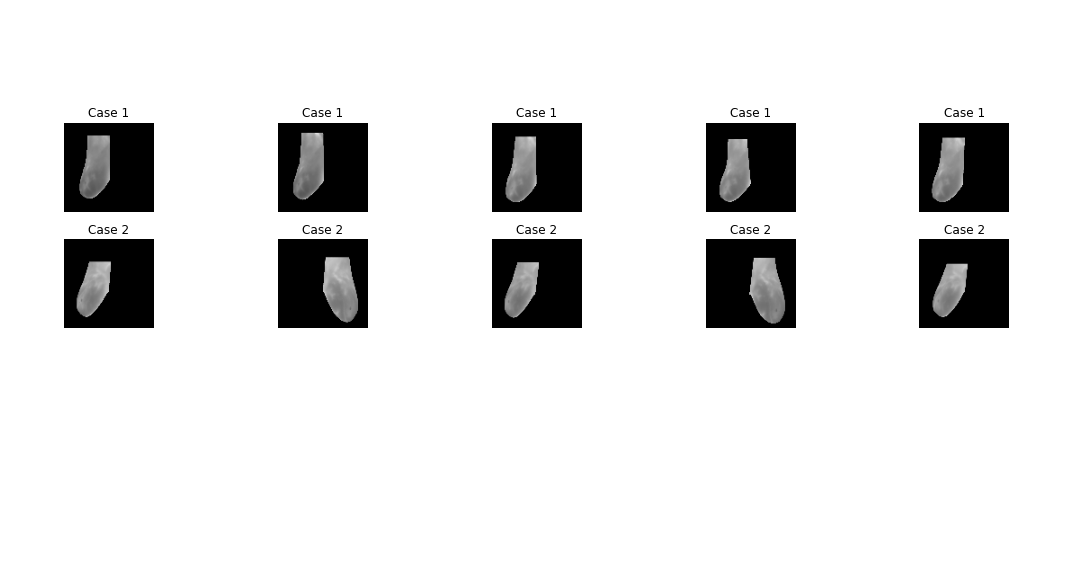

In [52]:
fig, axs = plt.subplots(5, 5, figsize=(15, 8))

for etiqueta in range(5):
    imagenes_etiqueta = [X[i] for i in range(len(Y)) if Y[i] == etiqueta]
    etiquetas_etiqueta = [Y[i] for i in range(len(Y)) if Y[i] == etiqueta]

    for i in range(min(5, len(imagenes_etiqueta))):
        row = etiqueta
        col = i

        axs[row, col].imshow(imagenes_etiqueta[i], cmap='gray')
        axs[row, col].set_title(f'Case {etiquetas_etiqueta[i]}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()

In [53]:
def visualize_images_canny(image_set, title):
    plt.figure(figsize=(15, 10))
    for i in range(5):
        random_image = random.choice(image_set)

        img_gray = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(img_gray, 80, 100)

        plt.subplot(1, 5, i+1)
        plt.imshow(edges)
        plt.axis('off')
        plt.title(title)
    plt.show()

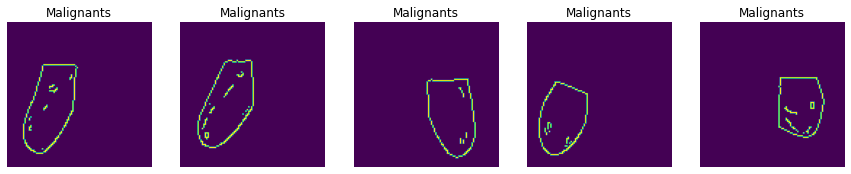

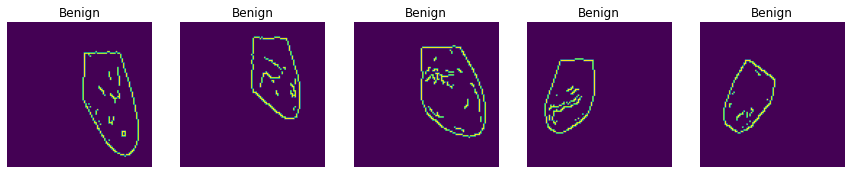

In [64]:
Benign_indices = [i for i, label in enumerate(etiquetas) if label == 1]
Benign_subset = [data[i] for i in Benign_indices]

malignant_indices = [i for i, label in enumerate(etiquetas) if label == 2]
malignant_subset = [data[i] for i in malignant_indices]

visualize_images_canny(malignant_subset, "Malignants")
visualize_images_canny(Benign_subset, "Benign")

### Modeling and Evaluation

In [33]:
X = np.array(data)
X = X.reshape(X.shape[0], -1)
Y = etiquetas

In [34]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logistic Regression 

In [36]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       185
           2       0.97      0.97      0.97       199

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384

accuracy:  0.9739583333333334
mean_absolute_error:  0.026041666666666668
mean_squared_error:  0.026041666666666668


### Random Forest Classifier

In [37]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       185
           2       0.98      1.00      0.99       199

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384

accuracy:  0.9869791666666666
mean_absolute_error:  0.013020833333333334
mean_squared_error:  0.013020833333333334


### Decision Tree Classifier

In [38]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           1       0.99      0.96      0.98       185
           2       0.96      0.99      0.98       199

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384

accuracy:  0.9765625
mean_absolute_error:  0.0234375
mean_squared_error:  0.0234375


### KNeighbors Classifier

In [39]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       185
           2       0.98      1.00      0.99       199

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384

accuracy:  0.9895833333333334
mean_absolute_error:  0.010416666666666666
mean_squared_error:  0.010416666666666666


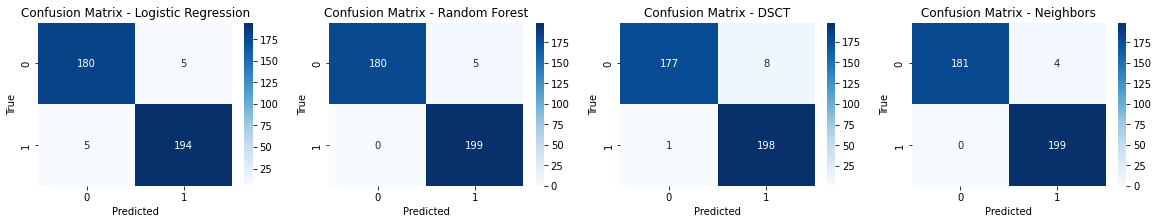

In [40]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')


sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

plt.show()

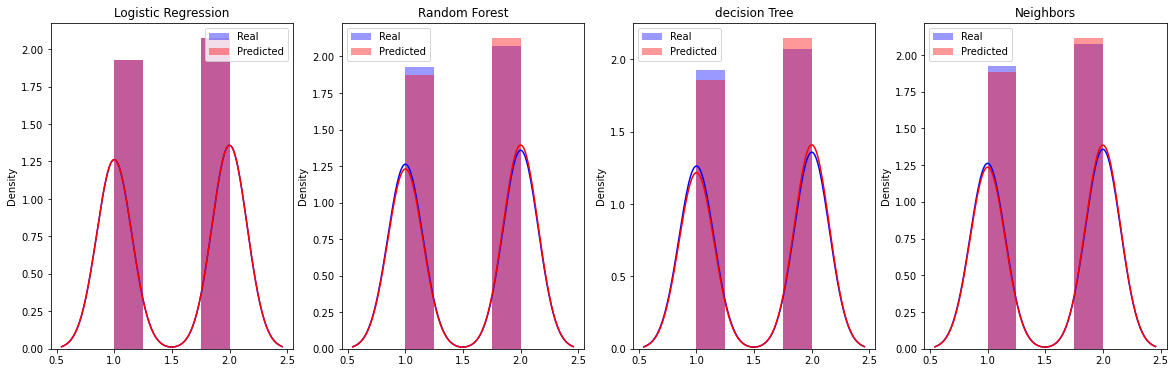

In [41]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Blue')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Blue')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Blue')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Blue')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()